In [1]:
# Imports ======================================================================================================================
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from sklearn.cluster import DBSCAN

In [2]:
# Data reading =================================================================================================================
dfo = pd.read_csv('/Users/Luis1/Projetos/Python/estudo/anomaly_detection/datasets/csv/btc_orderbook_df.csv')
dft = pd.read_csv('/Users/Luis1/Projetos/Python/estudo/anomaly_detection/datasets/csv/btc_trades_df.csv')
dfo.columns = ['price', 'volume', 'type']
dft.columns = ['date','type','price', 'volume']

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))

In [3]:
display_side_by_side([dfo.head(10), dft.head(10)], ['OrderBook', 'Trade'])
display_side_by_side([dfo.describe(), dft.describe()], ['OrderBook-Describe', 'Trade-Describe'])

,price,volume,type
0,207100.000000,0.022100,sell
1,207165.000000,0.328000,sell
2,207273.000000,0.328000,sell
3,207352.000000,0.499000,sell
4,207550.990000,0.017000,sell
5,207634.976903,0.566024,sell
6,207634.982241,0.566024,sell
7,207634.987570,0.245000,sell
8,207638.330000,0.183000,sell
9,207638.340000,0.000010,sell


In [4]:
# Data standardization =========================================================================================================
scaler = StandardScaler()
anomaly_inputs = ['price', 'volume']
dfo[['price_T','volume_T']] = scaler.fit_transform(dfo[anomaly_inputs])
dft[['price_T','volume_T']] = scaler.fit_transform(dft[anomaly_inputs])
display_side_by_side([dfo.head(10), dft.head(10)], ['OrderBook-Standard', 'Trade-Standard'])

,price,volume,type,price_T,volume_T
0,207100.000000,0.022100,sell,0.279348,-0.084053
1,207165.000000,0.328000,sell,0.280358,1.772245
2,207273.000000,0.328000,sell,0.282038,1.772245
3,207352.000000,0.499000,sell,0.283266,2.809926
4,207550.990000,0.017000,sell,0.286361,-0.115001
5,207634.976903,0.566024,sell,0.287667,3.216651
6,207634.982241,0.566024,sell,0.287667,3.216651
7,207634.987570,0.245000,sell,0.287667,1.268574
8,207638.330000,0.183000,sell,0.287719,0.892339
9,207638.340000,0.000010,sell,0.287719,-0.218102


In [5]:
dbscanO = DBSCAN(eps=0.5, min_samples = 12, metric='euclidean', algorithm='ball_tree', leaf_size=30)
dbscanO.fit(dfo[['price_T','volume_T']])
dfo['dbscan'] = dbscanO.labels_
dfo

,price,volume,type,price_T,volume_T,dbscan
0,207100.00,0.022100,sell,0.279348,-0.084053,0
1,207165.00,0.328000,sell,0.280358,1.772245,0
2,207273.00,0.328000,sell,0.282038,1.772245,0
3,207352.00,0.499000,sell,0.283266,2.809926,-1
4,207550.99,0.017000,sell,0.286361,-0.115001,0
...,...,...,...,...,...,...
1995,20940.00,0.001008,buy,-2.615653,-0.212045,0
1996,20600.00,0.000022,buy,-2.620941,-0.218028,0
1997,20574.71,0.068247,buy,-2.621334,0.195981,0
1998,20416.01,0.000070,buy,-2.623802,-0.217738,0


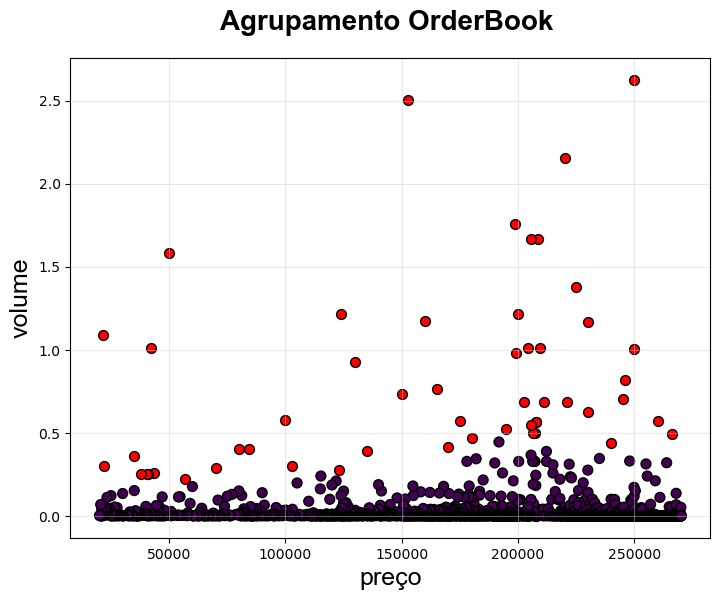

Counter({0: 1947, -1: 53})
            price    volume  type   price_T  volume_T  dbscan
3   207352.000000  0.499000  sell  0.283266  2.809926      -1
5   207634.976903  0.566024  sell  0.287667  3.216651      -1
6   207634.982241  0.566024  sell  0.287667  3.216651      -1
51  208468.000000  1.668000  sell  0.300622  9.903787      -1
54  209533.000000  1.012000  sell  0.317184  5.922972      -1
Number of clusters = 1


In [10]:

outliers_dfo = dfo[dfo.dbscan == -1]
clusters_dfo = dfo[dfo.dbscan != -1]

colors = dbscanO.labels_
color_clusters = colors[colors != -1]
color_outliers = 'red'

clusters = Counter(dbscanO.labels_)

fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(x=clusters_dfo['price'], y=clusters_dfo['volume'], c=color_clusters, edgecolor='black', s=50)
ax.scatter(x=outliers_dfo['price'], y=outliers_dfo['volume'], c=color_outliers, edgecolor='black',s=50)

ax.set_xlabel('preço', family='Arial', fontsize=18)
ax.set_ylabel('volume', family='Arial', fontsize=18)

plt.title('Agrupamento OrderBook ', family='Arial', fontsize=20, fontweight='bold', pad=20)
plt.grid(which='major', color='#cccccc', alpha=0.45)
plt.show()

print(clusters)
print(dfo[dfo.dbscan == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))